## Titanic Survival Decision Tree


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



In [6]:
data_train = pd.read_csv('Titanic_export/train.csv', sep = ",")

# Cleaning the training data
d_train = data_train[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

d_train["Sex"].loc[d_train["Sex"]=="male"] = 0
d_train["Sex"].loc[d_train["Sex"]=="female"] = 1

d_train = d_train[pd.notnull(d_train['Age'])]
d_train = d_train[pd.notnull(d_train['Embarked'])]

d_train["Embarked"].loc[d_train["Embarked"]=="C"] = 0
d_train["Embarked"].loc[d_train["Embarked"]=="Q"] = 1
d_train["Embarked"].loc[d_train["Embarked"]=="S"] = 2

X_train = np.array(d_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])
y_train = np.array(d_train["Survived"])

/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
clf = DecisionTreeClassifier(max_depth = 4)
tree_model = clf.fit(X_train, y_train)

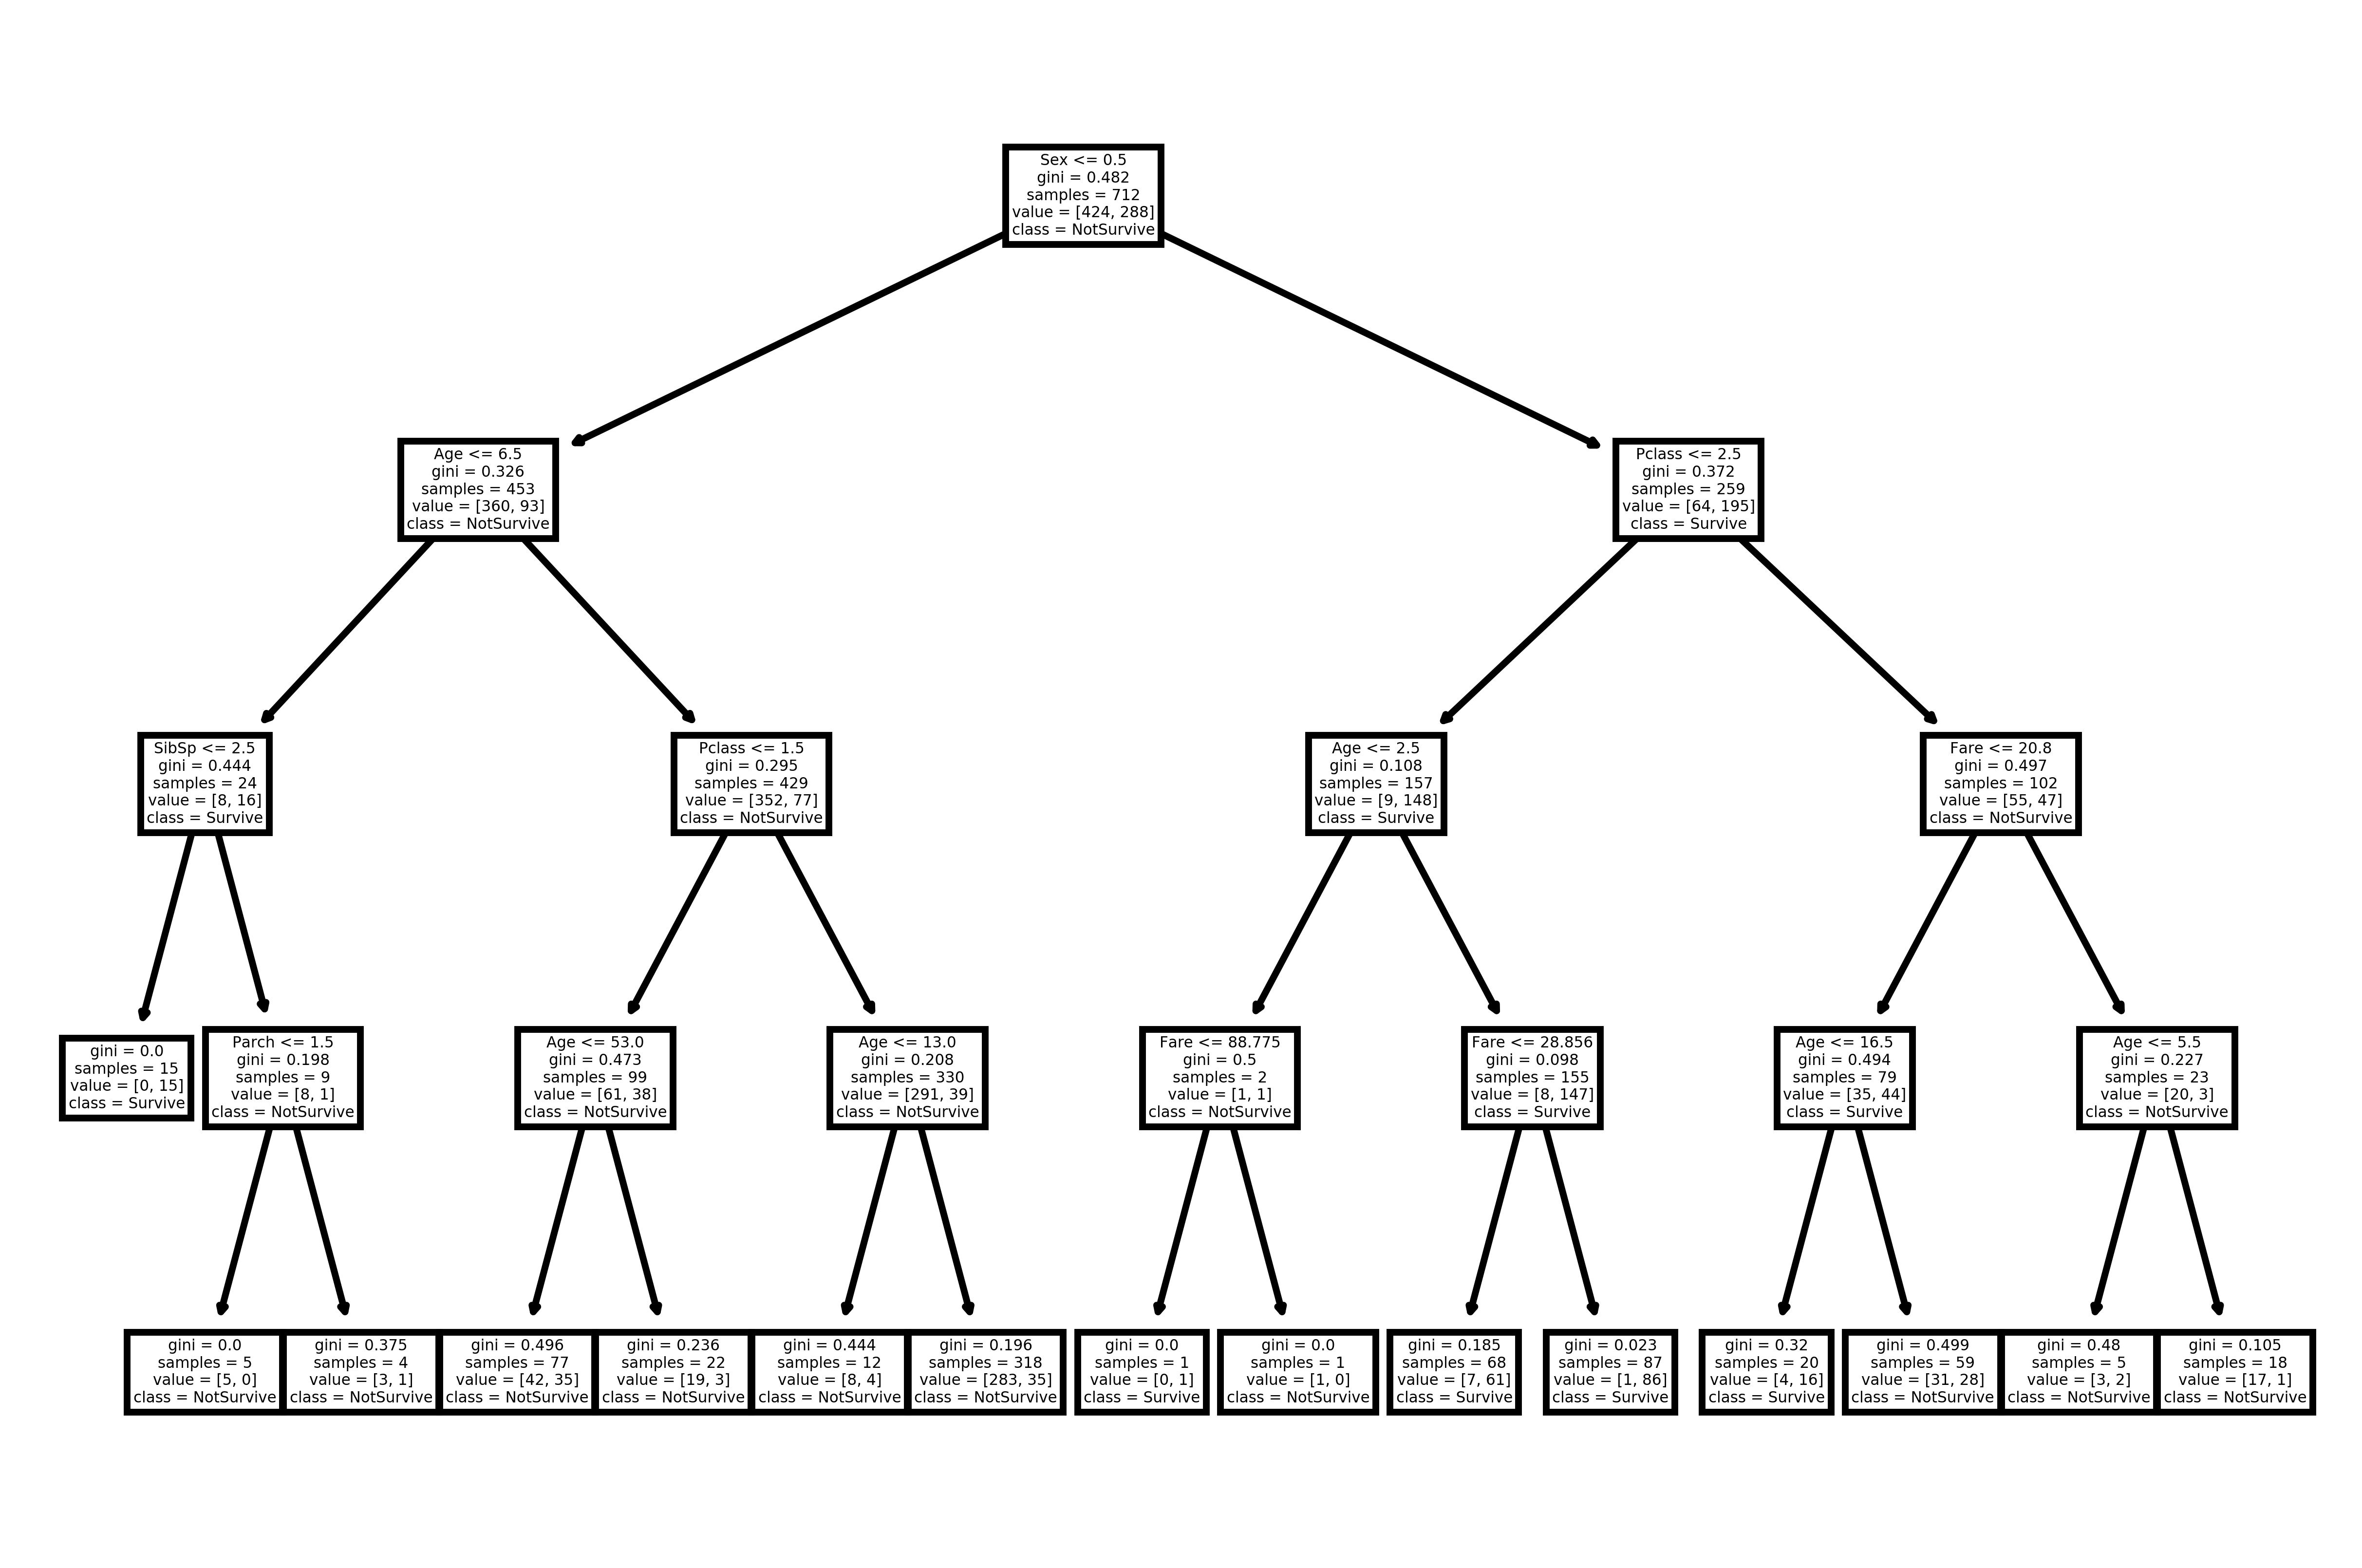

In [8]:
fn = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare","Embarked"]
cn = ["NotSurvive", "Survive"]
fig, axes = plt.subplots(nrows = 1,ncols = 1, dpi=1000)
tree.plot_tree(clf, feature_names = fn, class_names = cn)
fig.savefig('titanic_tree.png')

### Test set

In [31]:
data_test = pd.read_csv('Titanic_export/test.csv', sep = ",")

# Cleaning the test data
d_test = data_test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

d_test["Sex"].loc[d_test["Sex"]=="male"] = 0
d_test["Sex"].loc[d_test["Sex"]=="female"] = 1

d_test = d_test[pd.notnull(d_test['Age'])]
d_test = d_test[pd.notnull(d_test['Embarked'])]

d_test["Embarked"].loc[d_test["Embarked"]=="C"] = 0
d_test["Embarked"].loc[d_test["Embarked"]=="Q"] = 1
d_test["Embarked"].loc[d_test["Embarked"]=="S"] = 2


print(d_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    332 non-null    int64  
 1   Sex       332 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     332 non-null    int64  
 4   Parch     332 non-null    int64  
 5   Fare      331 non-null    float64
 6   Embarked  332 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 20.8+ KB
None


/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impo

### Replacing the NaN value with the average

In [32]:
print(d_test[d_test["Fare"].isnull()])

     Pclass Sex   Age  SibSp  Parch  Fare Embarked
152       3   0  60.5      0      0   NaN        2


In [43]:
from scipy import stats

print(np.mean(d_test['Fare']))

d_test.loc[152,'Fare'] = np.mean(d_test['Fare'])

40.98208731117823


In [48]:
print(d_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    332 non-null    int64  
 1   Sex       332 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     332 non-null    int64  
 4   Parch     332 non-null    int64  
 5   Fare      332 non-null    float64
 6   Embarked  332 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 30.8+ KB
None


In [49]:
X_test = np.array(d_test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

### Predicting survival of test set.

In [50]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

### Unfortunately, I don't have the survival column for the test set.